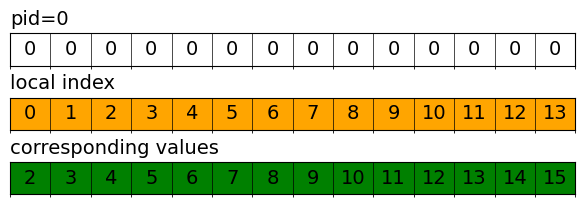

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
def plot_visualization(pids, local_indices, corresponding_values):
    # if len(local_indices) != len(corresponding_values):
    #     print("corresponding_values and local_indices has to be same length")
    #     return
    
    # Create figure and subplots
    fig, axes = plt.subplots(3, 1, figsize=(10, 2))
    ASPECT='0.8'
    pid = pids
    pids = [pid]* len(local_indices)
    # Plot the "pid=x" row
    axes[0].imshow(np.array([pids]), cmap=ListedColormap(["white"]), aspect=ASPECT, vmin=0, vmax=1)
    axes[0].set_xticks(np.arange(-0.5, len(pids), 1), minor=True)
    axes[0].grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    axes[0].set_yticks([])
    axes[0].set_title('pid={}'.format(pid), loc='left', fontsize=14)
    axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
    for i in range(len(pids)):
        axes[0].text(i, 0, str(pids[i]), ha='center', va='center', fontsize=14, color='black')

    # Plot the "local index" row
    axes[1].imshow(np.array([local_indices]), cmap=ListedColormap(["orange"]), aspect=ASPECT)
    axes[1].set_xticks(np.arange(-0.5, len(local_indices), 1), minor=True)
    axes[1].grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    axes[1].set_yticks([])
    axes[1].set_title('local index', loc='left', fontsize=14)
    axes[1].tick_params(axis='x', bottom=False, labelbottom=False)
    for i in range(len(local_indices)):
        axes[1].text(i, 0, str(local_indices[i]), ha='center', va='center', fontsize=14, color='black')

    # Plot the "corresponding values" row
    unique_value = corresponding_values[0] if corresponding_values else 0  # Assume the entire row has the same color
    axes[2].imshow(np.full((1, len(corresponding_values)), unique_value), cmap=ListedColormap(["green"]), aspect=ASPECT)
    axes[2].set_xticks(np.arange(-0.5, len(corresponding_values), 1), minor=True)
    axes[2].grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    axes[2].set_yticks([])
    axes[2].set_title('corresponding values', loc='left', fontsize=14)
    axes[2].tick_params(axis='x', bottom=False, labelbottom=False)
    for i in range(len(corresponding_values)):
        axes[2].text(i, 0, str(corresponding_values[i]), ha='center', va='center', fontsize=14, color='black')

    # Layout adjustments
    plt.subplots_adjust(hspace=0.2)
    plt.tight_layout(pad=0.5)
    plt.show()

# Example usage
pids = 0
local_indices = list(range(14))
corresponding_values = list(range(2, 16))

plot_visualization(pids, local_indices, corresponding_values)


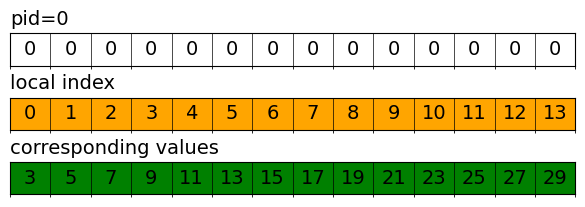

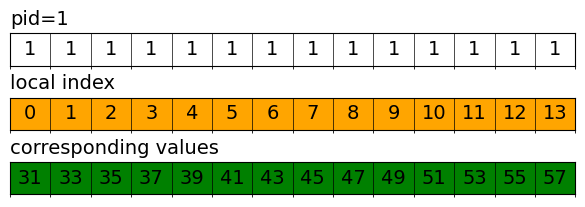

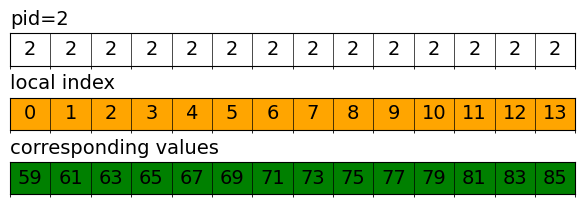

In [70]:
pids = 0
local_indices = list(range(14))
corresponding_values = list(range(3, 29+2,2))

plot_visualization(pids, local_indices, corresponding_values)

pids = 1
local_indices = list(range(14))
corresponding_values = list(range(31, 57+2,2))

plot_visualization(pids, local_indices, corresponding_values)

pids = 2
local_indices = list(range(14))
corresponding_values = list(range(59, 85+2,2))

plot_visualization(pids, local_indices, corresponding_values)

In [65]:
from math import *
def firstE(pid, n, p):
    return floor(pid*n/p)
def lastE(pid,n,p):
    return floor((pid+1)*n/p)-1
def stripS(pid,n,p):
    return floor((pid+1)*n/p)-1-floor(pid*n/p)+1
pid=0
n=14*3
p=3

for i in range(0,p):
    print("pid:{} start ele: {}, end ele: {}, size: {}".format(i, firstE(i,n,p), lastE(i,n,p),stripS(i,n,p)))

pid:0 start ele: 0, end ele: 13, size: 14
pid:1 start ele: 14, end ele: 27, size: 14
pid:2 start ele: 28, end ele: 41, size: 14


In [85]:
def firstN(pid, n, p):
    return 3+2*floor(pid*((n-3)/2+1)/p)
def lastN(pid, n, p):
    return 3+2*floor((pid+1)*((n-3)/2+1)/p)-2
def stripS(pid, n, p):
    return int((lastN(pid, n, p)-firstN(pid, n, p))/2+1)
pid=0
n=14*3
p=3

for i in range(0,p):
    print("pid:{} start ele: {}, end ele: {}, size: {}".format(i, firstN(i,n,p), lastN(i,n,p),stripS(i,n,p)))
    prime=3
    if prime*prime > firstN(i,n,p):
        first = int((prime*prime-firstN(i,n,p))/2)
    else:
        if firstN(i,n,p) % prime == 0:
            first =0
        else:
            first = int((prime-firstN(i,n,p)%prime)/2)
    print("first multiply of prime {} is at {}".format(prime, first))

pid:0 start ele: 3, end ele: 13, size: 6
first multiply of prime 3 is at 3
pid:1 start ele: 15, end ele: 27, size: 7
first multiply of prime 3 is at 0
pid:2 start ele: 29, end ele: 41, size: 7
first multiply of prime 3 is at 0


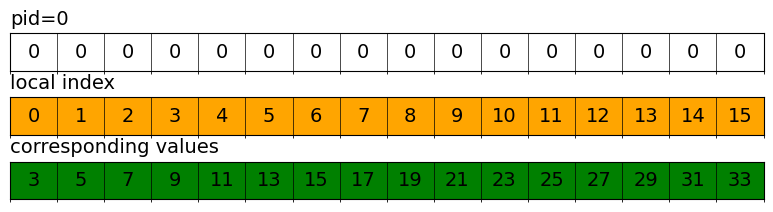

pid:0 start ele: 3, end ele: 33, size: 16
first multiply of prime 5 is at 11


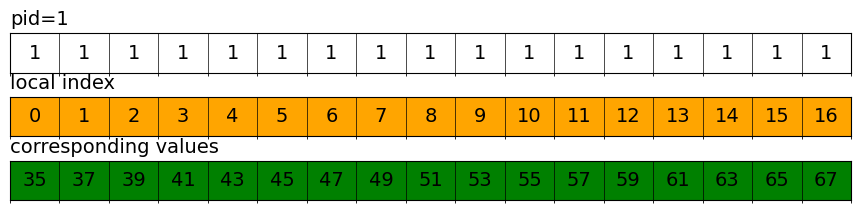

pid:1 start ele: 35, end ele: 67, size: 17
first multiply of prime 5 is at 0


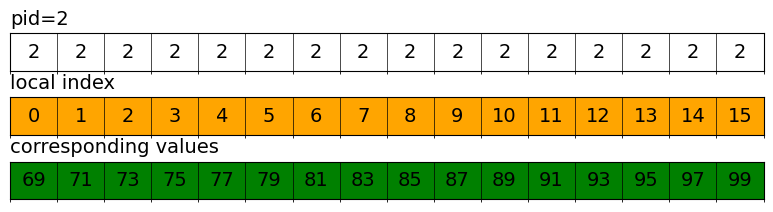

pid:2 start ele: 69, end ele: 99, size: 16
first multiply of prime 5 is at 3


In [91]:
# example for exclude 2

pid=0
n=100
p=3
for i in range(0,p):
    
    local_indices = list(range(stripS(i,n,p)))
    corresponding_values = list(range(firstN(i,n,p), lastN(i,n,p)+2,2))
    plot_visualization(i, local_indices, corresponding_values)
    print("pid:{} start ele: {}, end ele: {}, size: {}".format(i, firstN(i,n,p), lastN(i,n,p),stripS(i,n,p)))
    prime=5
    if prime*prime > firstN(i,n,p):
        first = int((prime*prime-firstN(i,n,p))/2)
    else:
        if firstN(i,n,p) % prime == 0:
            first = 0
        else:
            first_val = int(prime*(floor((firstN(i,n,p)/prime+1)/2)*2+1))
            first = int((first_val - firstN(i,n,p))/2)
    print("first multiply of prime {} is at {}".format(prime, first))
    


In [84]:
3-29%3

1